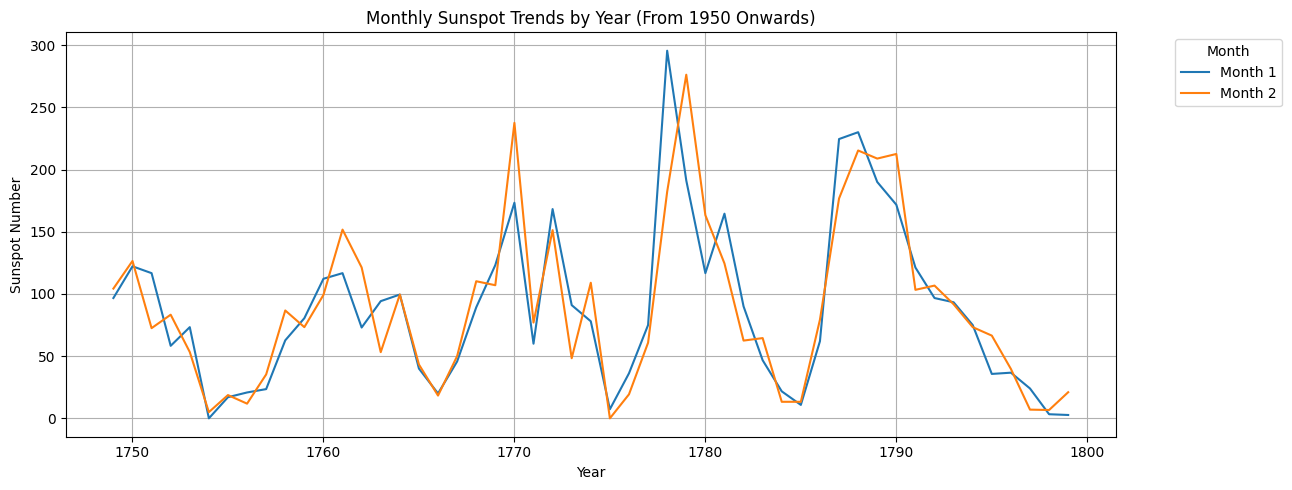

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'})

# Filter data for years after 1950
df_recent = df[df['Year'] < 1800]

# Calculate average sunspot number per year and month
monthly_avg = df_recent.groupby(['Year', 'Month'])['SunspotNumber'].mean().reset_index()

# Plot the data
plt.figure(figsize=(13, 5))

# Draw one line for each month over the years
for month in range(1, 3):
    month_data = monthly_avg[monthly_avg['Month'] == month]
    plt.plot(month_data['Year'], month_data['SunspotNumber'], label=f"Month {month}")

# Customize the plot
plt.title("Monthly Sunspot Trends by Year (From 1950 Onwards)")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

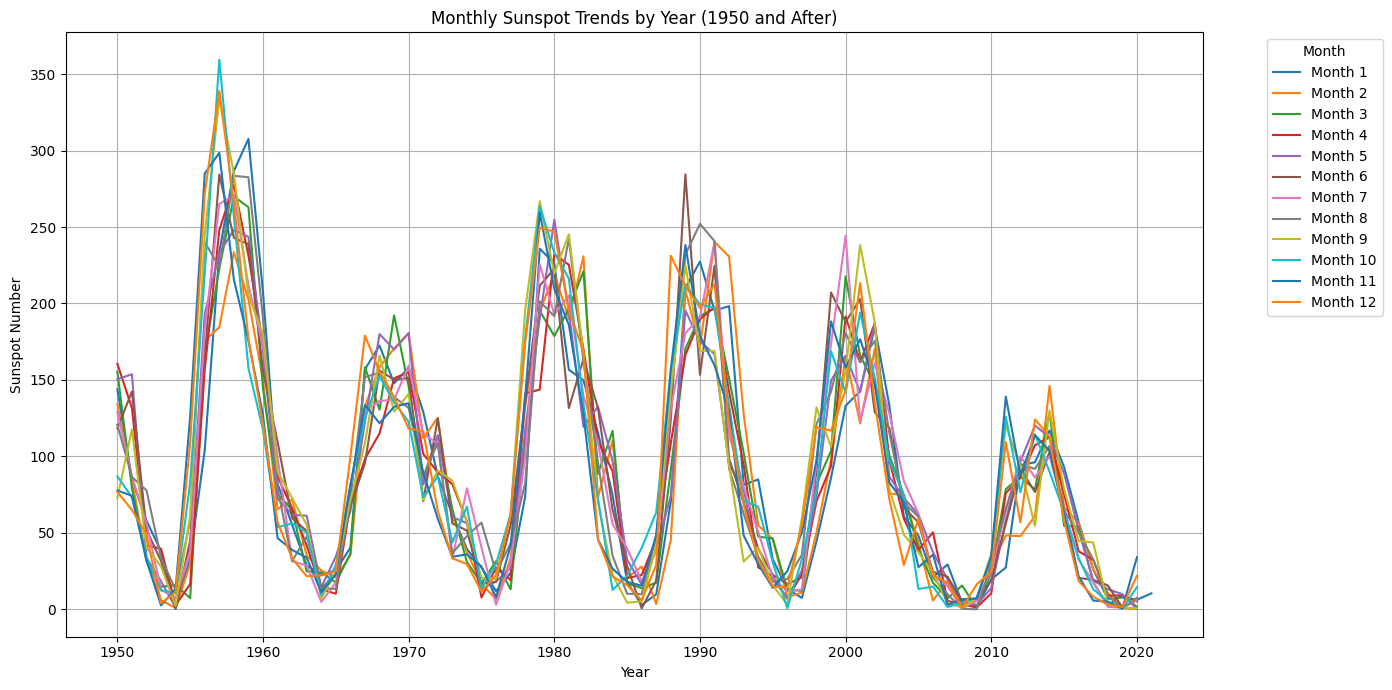

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükle
df = pd.read_csv("Sunspots.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'})

# 1950 sonrası verilerle çalış
df_recent = df[df['Year'] >= 1950]

# Her yıl ve ay için ortalama güneş lekesi sayısını hesapla
monthly_avg = df_recent.groupby(['Year', 'Month'])['SunspotNumber'].mean().reset_index()

# Grafiği çiz
plt.figure(figsize=(14, 7))

# Her ay için yıllara göre çizgi grafiği çiz
for month in range(1, 13):
    month_data = monthly_avg[monthly_avg['Month'] == month]
    plt.plot(month_data['Year'], month_data['SunspotNumber'], label=f"Month {month}")

# Grafik başlık ve eksen ayarları
plt.title("Monthly Sunspot Trends by Year (1950 and After)")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


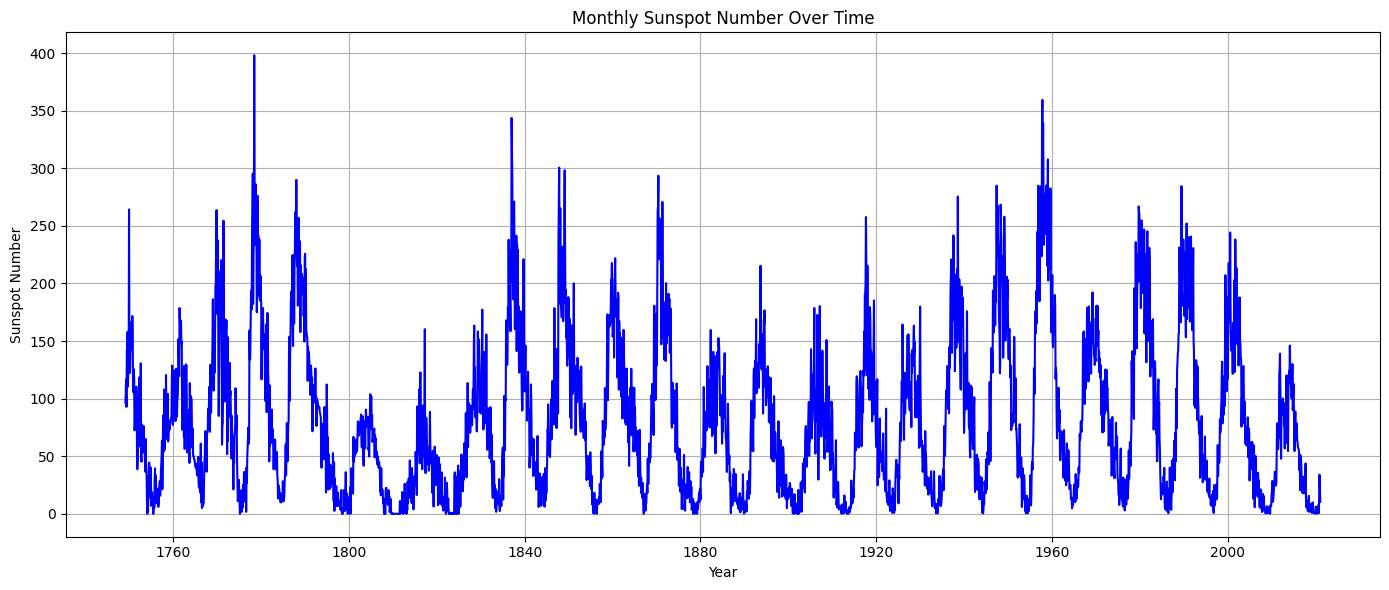

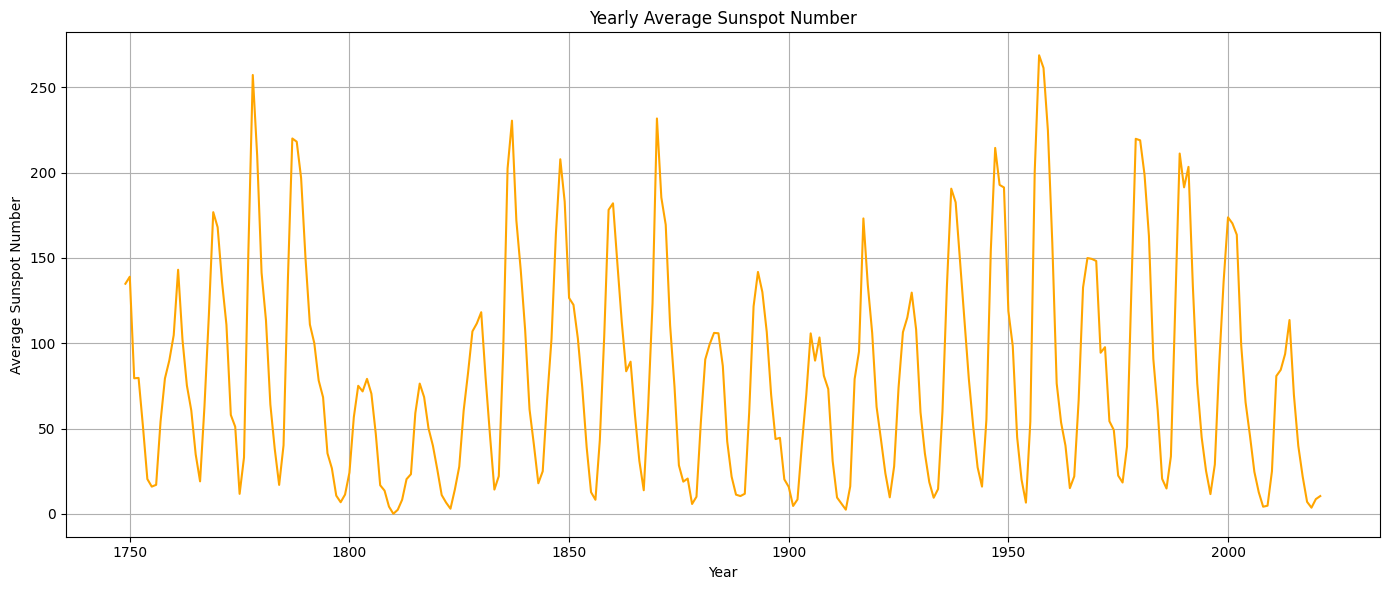

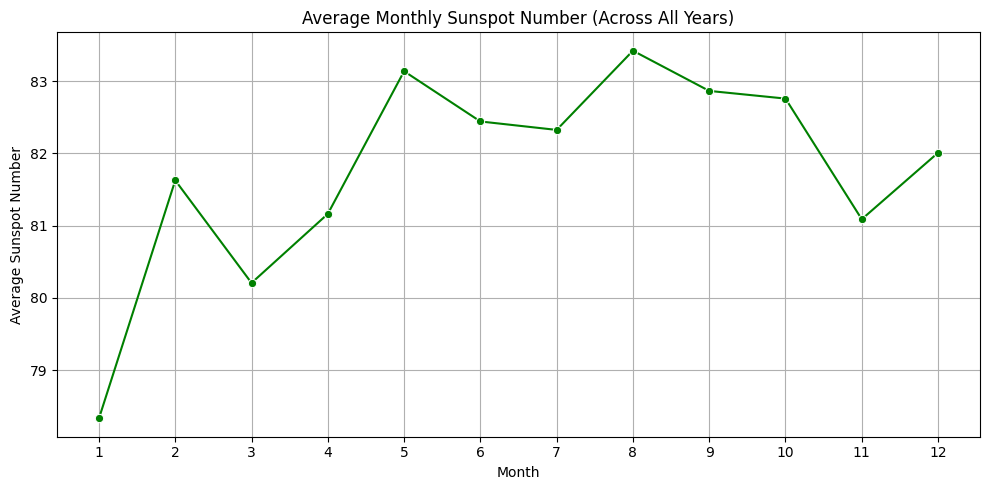

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Sunspots.csv")
df = df.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'})
df['Date'] = pd.to_datetime(df['Date'])

# Extract time components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# === 1. General trend over time ===
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Date", y="SunspotNumber", color="blue")
plt.title("Monthly Sunspot Number Over Time")
plt.xlabel("Year")
plt.ylabel("Sunspot Number")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 2. Yearly average sunspot number ===
yearly_avg = df.groupby("Year")["SunspotNumber"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_avg, x="Year", y="SunspotNumber", color="orange")
plt.title("Yearly Average Sunspot Number")
plt.xlabel("Year")
plt.ylabel("Average Sunspot Number")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 3. Monthly sunspot trends across all years ===
monthly_avg = df.groupby("Month")["SunspotNumber"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x="Month", y="SunspotNumber", marker='o', color="green")
plt.title("Average Monthly Sunspot Number (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average Sunspot Number")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv("Sunspots.csv")
sns.violinplot(x = 'Date', 
               y = 'Monthly Mean Total Sunspot Number', 
               data = df, 
               inner = None, 
               )

sns.swarmplot(x = 'Date', 
              y = 'Monthly Mean Total Sunspot Number', 
              data = df, 
              color = 'k', 
              alpha = 0.7)

plt.title('Attack by Type')

In [ ]:
# Seaborn ile grafiği oluşturma
df = pd.read_csv("Sunspots.csv")
sns.lmplot(x='Monthly Mean Total Sunspot Number', y='Date', data=df,
           fit_reg=False, 
           hue='Date')
 
# Matplotlib ile eksen sınırlarını belirleme
plt.ylim(0, None)
plt.xlim(0, None)

NameError: name 'pd' is not defined

In [ ]:
new_df = df.loc[(df.index.year >1899 )&(df.index.year <2021 )].copy()
new_df = new_df.reset_index()  

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Date']
    ys = series['Monthly Mean Total Sunspot Number']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date(2000-2021)')
_ = plt.ylabel('Monthly Mean Total Sunspot Number')

In [ ]:
if 'Year' not in df.columns or 'Month' not in df.columns:
	df['Year'] = df.index.year
	df['Month'] = df.index.month


df_last50 = df[df['Year'] >= (df['Year'].max() - 39)].copy()

heatmap_data = df_last50.pivot_table(
	index='Year',
	columns='Month',
	values='Monthly Mean Total Sunspot Number',
	aggfunc='mean'
)

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="inferno", annot=False, linewidths=0.5, linecolor='gray')
plt.title("Monthly Average Sunspot Numbers - Last 50 Years (Inferno Palette)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

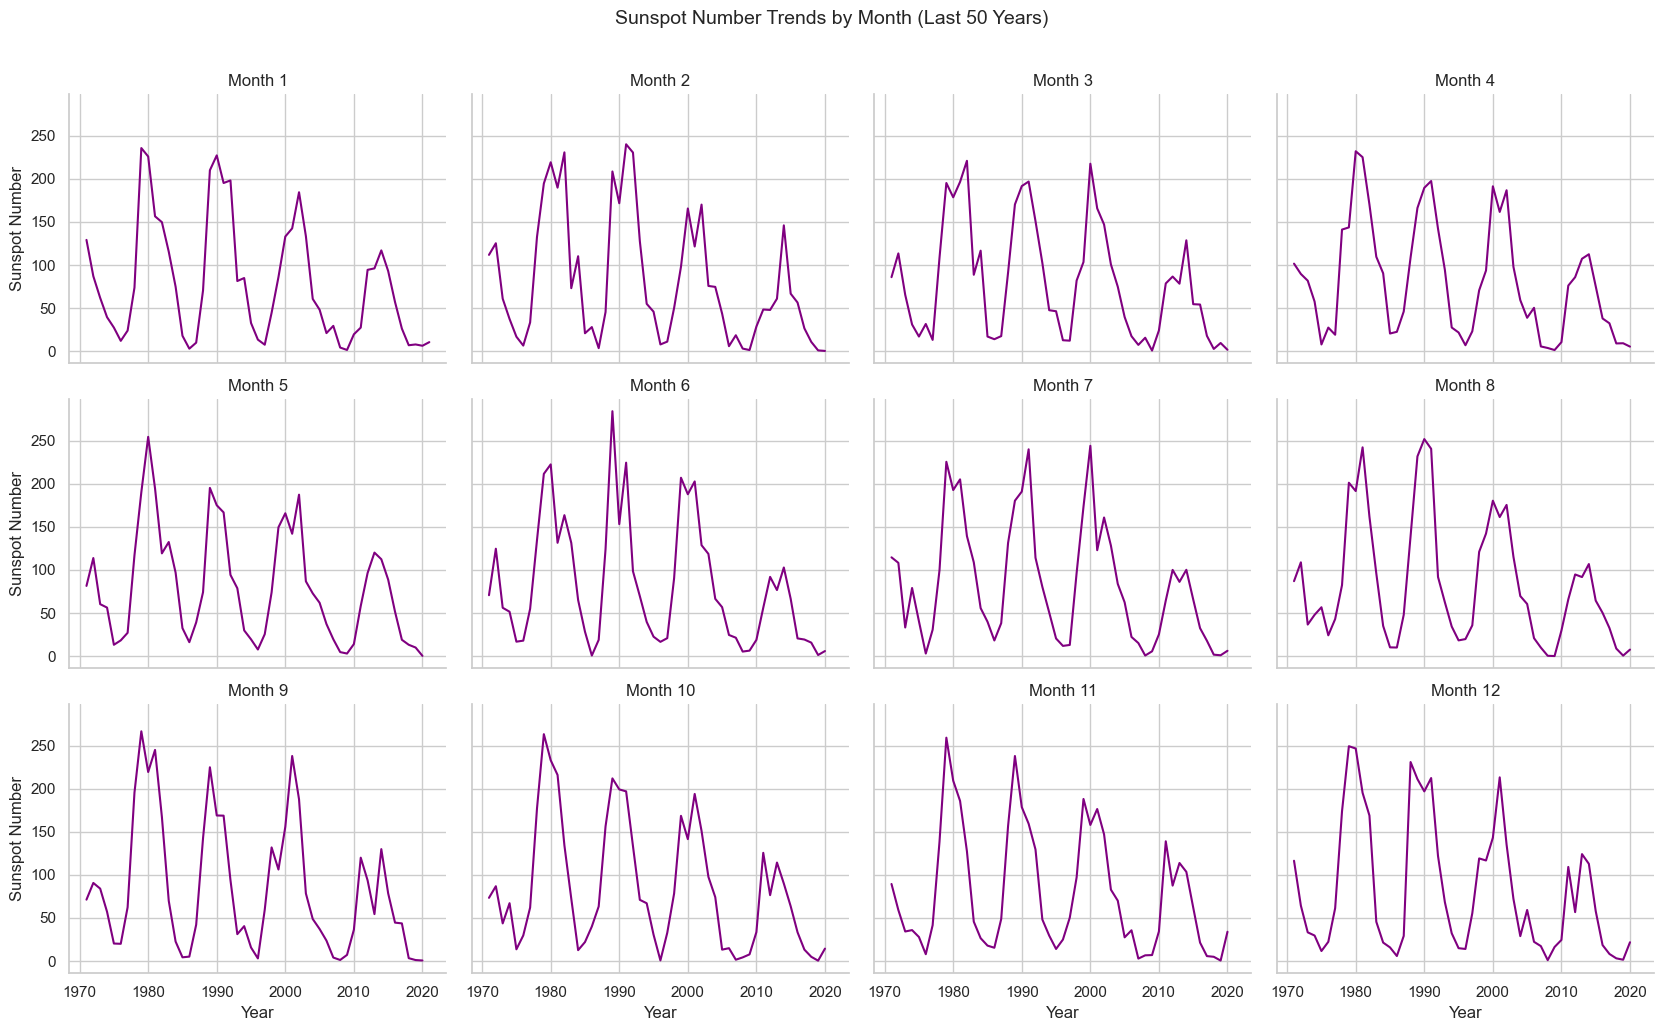

In [ ]:

df_last50 = df[df['Year'] >= (df['Year'].max() - 50)]


sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df_last50, col='Month', col_wrap=4, height=3.5, aspect=1.2)
g.map(sns.lineplot, 'Year', 'SunspotNumber', color='purple')
g.set_titles("Month {col_name}")
g.set_axis_labels("Year", "Sunspot Number")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Sunspot Number Trends by Month (Last 50 Years)", fontsize=14)
plt.show()

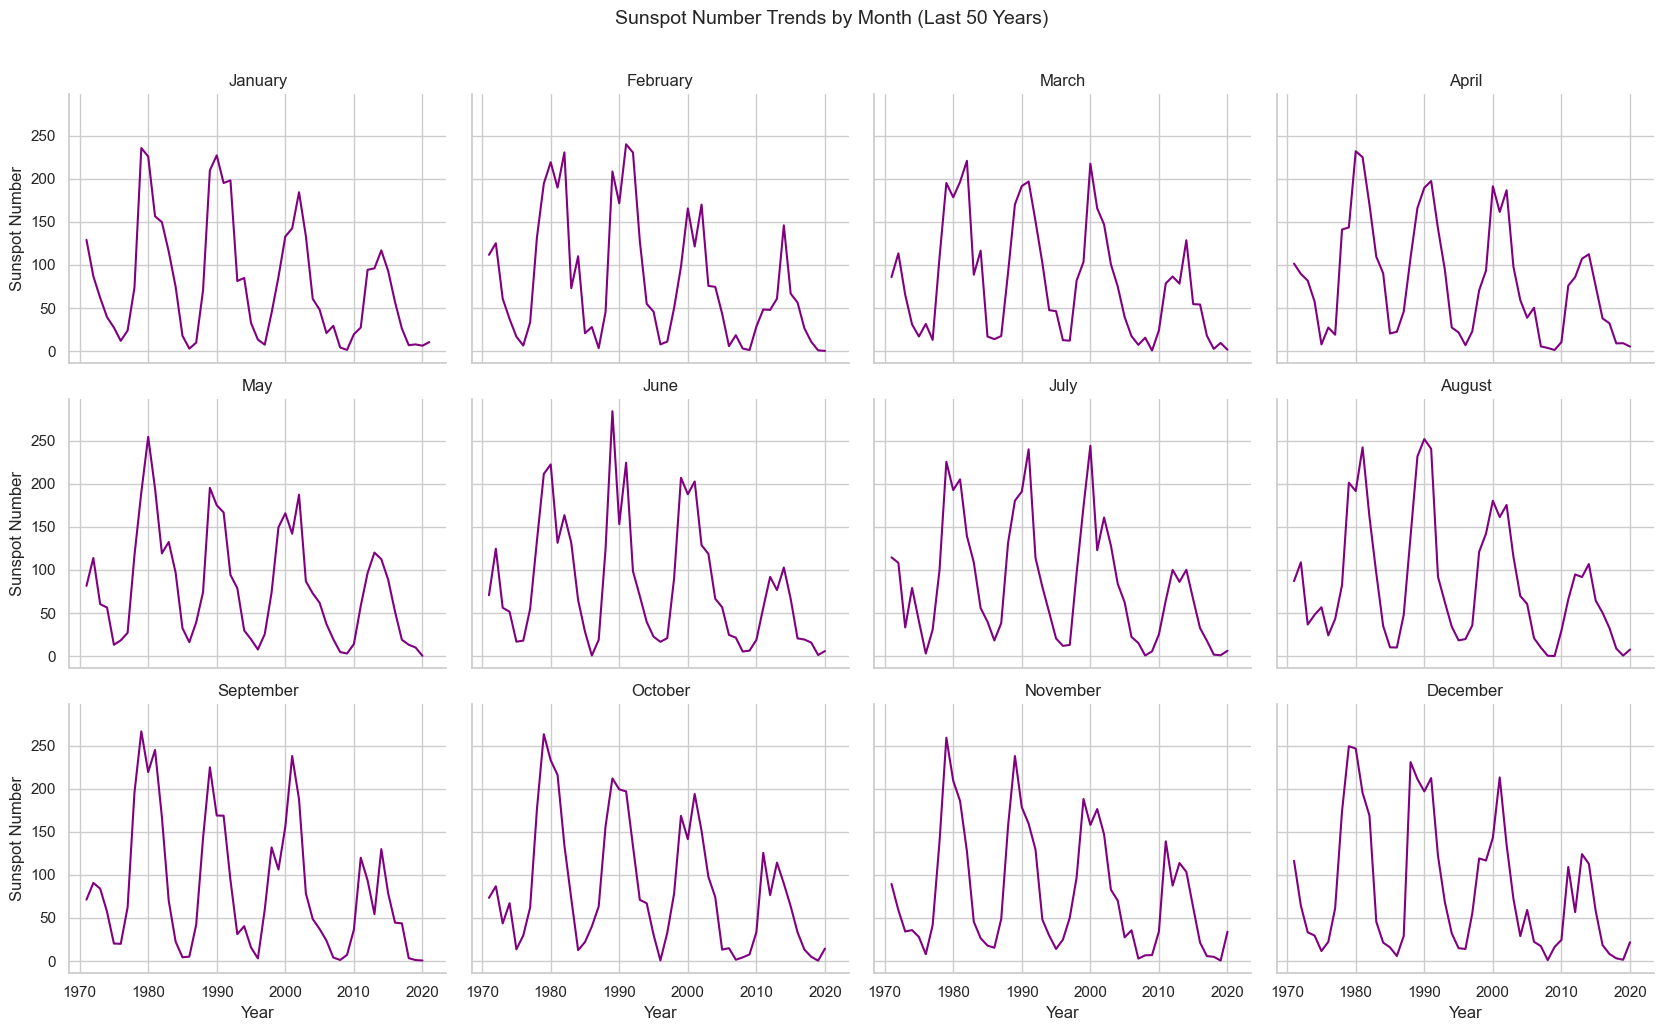

In [ ]:
df['MonthName'] = df['Date'].dt.strftime('%B')  # e.g., January, February...

# Optional: Order months correctly in plots
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['MonthName'] = pd.Categorical(df['MonthName'], categories=month_order, ordered=True)

# Filter last 50 years
df_last50 = df[df['Year'] >= (df['Year'].max() - 50)]

# Plot monthly trends using Seaborn FacetGrid
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df_last50, col='MonthName', col_wrap=4, height=3.5, aspect=1.2)
g.map(sns.lineplot, 'Year', 'SunspotNumber', color='purple')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Sunspot Number")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Sunspot Number Trends by Month (Last 50 Years)", fontsize=14)
plt.show()
